In [1]:
import pandas as pd

df = pd.read_csv("SQF_2012_cleaned.csv")

In [4]:
import re

def simplify_crimsusp(reason):
    reason = str(reason).lower()
    if re.search(r'weapon|gun|knife|firearm', reason):
       return 'Weapons'
    elif re.search(r'burglary|trespass|larceny|theft|felony', reason):
       return 'Property'
    elif re.search(r'drug|narcotic|marijuana', reason):
        return 'Drugs'
    elif re.search(r'assault|robbery|fight', reason):
        return 'Violent'
    else:
       return 'Other'

df['crimsusp_group']=df['crimsusp'].apply(simplify_crimsusp)



In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['crimsusp_encoded'] = le.fit_transform(df['crimsusp_group'])

In [6]:

le = LabelEncoder()
df['time_of_day'] = le.fit_transform(df['time_of_day'])

In [7]:
df['sex_encoded']=df['sex'].map({'M':1,'F':0})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='crimsusp_encoded',hue=)

In [8]:
df.head()

,datestop,timestop,pct,sex,race,age,crimsusp,cs_objcs,cs_descr,cs_casng,...,precinct,stop_datetime,hour,weekday,time_of_day,stop_date,stop_time,crimsusp_encoded,crimsusp_group,sex_encoded
0,1012012,115,40,M,B,20.0,ROBBERY,0,0,1,...,40.0,2012-10-01 01:15:00,1,Monday,3,1012012,115,3,Violent,1.0
1,1012012,310,23,M,Q,18.0,MISDEMEANOR,0,0,0,...,23.0,2012-10-01 03:10:00,3,Monday,3,1012012,310,1,Other,1.0
2,1012012,2000,81,M,B,19.0,ROBBERY,0,1,0,...,81.0,2012-10-01 20:00:00,20,Monday,1,1012012,2000,3,Violent,1.0
3,1022012,1245,81,M,B,37.0,ROBBERY,0,1,0,...,81.0,2012-10-02 12:45:00,12,Tuesday,0,1022012,1245,3,Violent,1.0
4,1042012,2220,66,M,Q,21.0,FELONY,0,1,1,...,66.0,2012-10-04 22:20:00,22,Thursday,3,1042012,2220,2,Property,1.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.cluster import KMeans


# Filter by a specific crime type (example: Weapons)
crime_choice = df[df['crimsusp_group'] == 'Weapons']

X = crime_choice[['pct', 'time_of_day']]





In [18]:
inertia=[]
K=range (1,10)

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

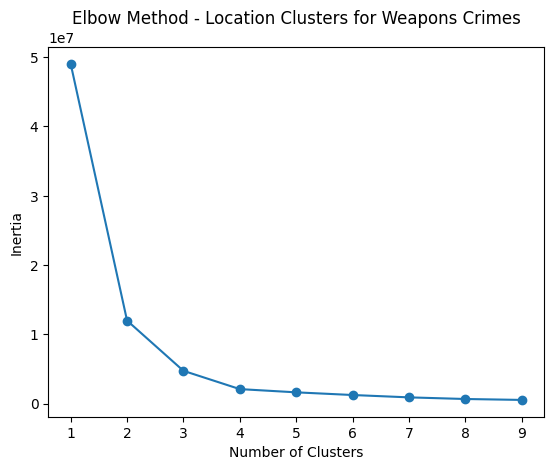

In [19]:
plt.plot(K,inertia, marker='o')
plt.title('Elbow Method - Location Clusters for Weapons Crimes')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

from the elbow plot above, the optimal number of clusters = 3

C:\Users\User\AppData\Local\Temp\ipykernel_19232\2855353860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_choice['time_label'] = crime_choice['time_of_day'].map(time_labels)


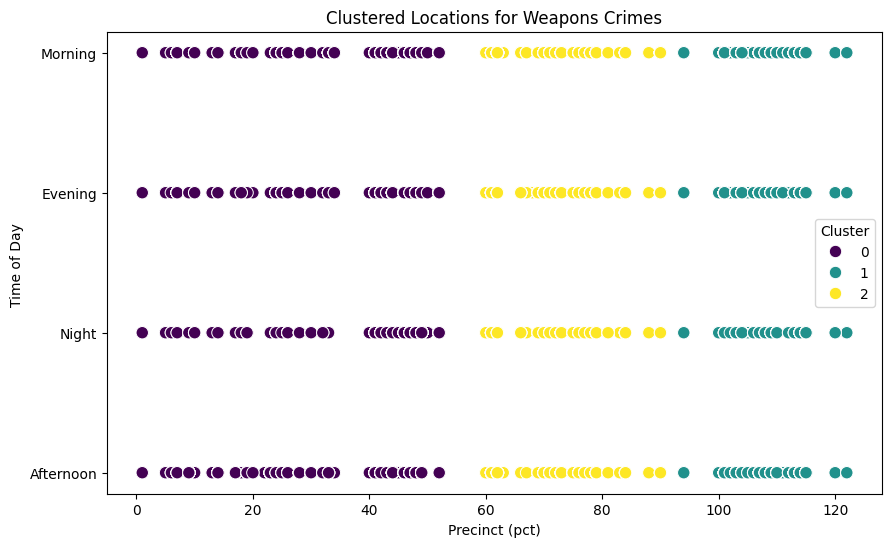

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



time_labels={0:'Afternoon',1:'Evening',2:'Night',3:'Morning'}
crime_choice['time_label'] = crime_choice['time_of_day'].map(time_labels)

plt.figure(figsize=(10,6))
sns.scatterplot(data=crime_choice, x='pct', y='time_label',
hue='cluster', palette='viridis', s=80)
plt.title('Clustered Locations for Weapons Crimes')
plt.xlabel('Precinct (pct)')
plt.ylabel('Time of Day ')
plt.legend(title='Cluster')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['race_encoded'] = le.fit_transform(df['race'])

In [32]:
reason_cols = ['cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout',
'cs_cloth', 'cs_drgtr', 'cs_furtv', 'cs_vcrim', 'cs_bulge']
X2 = df[['age', 'sex_encoded', 'race_encoded'] + reason_cols].fillna(0)

In [29]:
df1=df.dropna(subset=['age','sex_encoded','race_encoded']+reason_cols)

Running k = 1
Running k = 2
Running k = 3
Running k = 4
Running k = 5
Running k = 6
Running k = 7
Running k = 8
Running k = 9
Inertia length: 9
Homogeneity length: 9


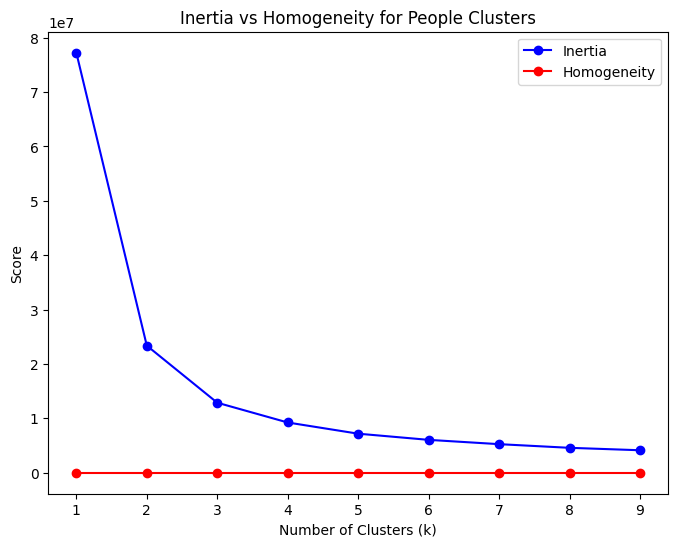

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
import matplotlib.pyplot as plt

inertia = []
homogeneity = []
K = range(1, 10)

for k in K:
   print("Running k =", k)
   kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
   kmeans.fit(X2)

# ✅ These must be indented INSIDE the for-loop
   inertia.append(kmeans.inertia_)
   if k == 1:
      homogeneity.append(0)
   else:
       homogeneity.append(homogeneity_score(kmeans.labels_, kmeans.labels_))

# ✅ After the loop
print("Inertia length:", len(inertia))
print("Homogeneity length:", len(homogeneity))

plt.figure(figsize=(8,6))
plt.plot(list(K), inertia, marker='o', label='Inertia', color='blue')
plt.plot(list(K), homogeneity, marker='o', label='Homogeneity', color='red')
plt.title('Inertia vs Homogeneity for People Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


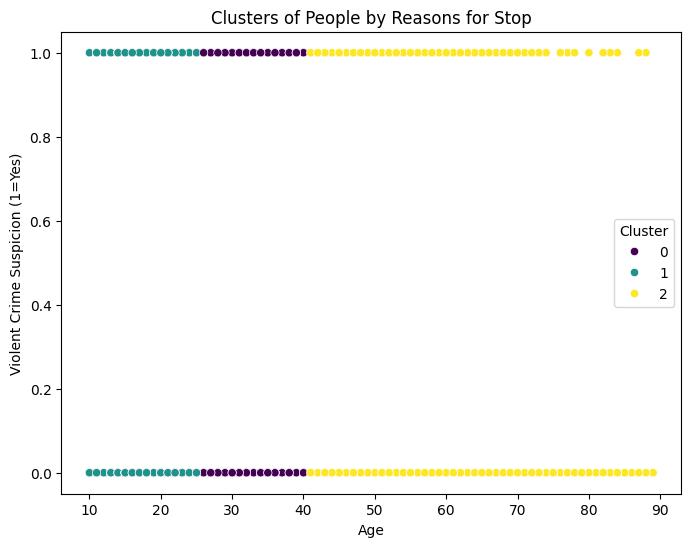

In [41]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='cs_vcrim', hue='cluster_people', palette='viridis')
plt.title('Clusters of People by Reasons for Stop')
plt.xlabel('Age')
plt.ylabel('Violent Crime Suspicion (1=Yes)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
reason_cols = ['cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout',
'cs_cloth', 'cs_drugtr', 'cs_furtv', 'cs_vcrim', 'cs_bulge']
X2 = df[['age', 'sex', 'race_encoded'] + reason_cols]


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['race_encoded'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])


from sklearn.cluster import KMeans

kmeans_people = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_people'] = kmeans_people.fit_predict(X2)


from sklearn.metrics import homogeneity_score
import matplotlib.pyplot as plt

inertia = []
homogeneity = []
K = range(1, 10)

for k in K:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X2)
inertia.append(kmeans.inertia_)
if k == 1:
homogeneity.append(0)
else:
homogeneity.append(homogeneity_score(kmeans.labels_, kmeans.labels_))

plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker='o', label='Inertia', color='blue')
plt.plot(K, homogeneity, marker='o', label='Homogeneity', color='red')
plt.title('Inertia vs Homogeneity for People Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.show()


import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='cs_vcrim', hue='cluster_people', palette='viridis')
plt.title('Clusters of People by Reasons for Stop')
plt.xlabel('Age')
plt.ylabel('Violent Crime Suspicion (1=Yes)')
plt.legend(title='Cluster')
plt.show()

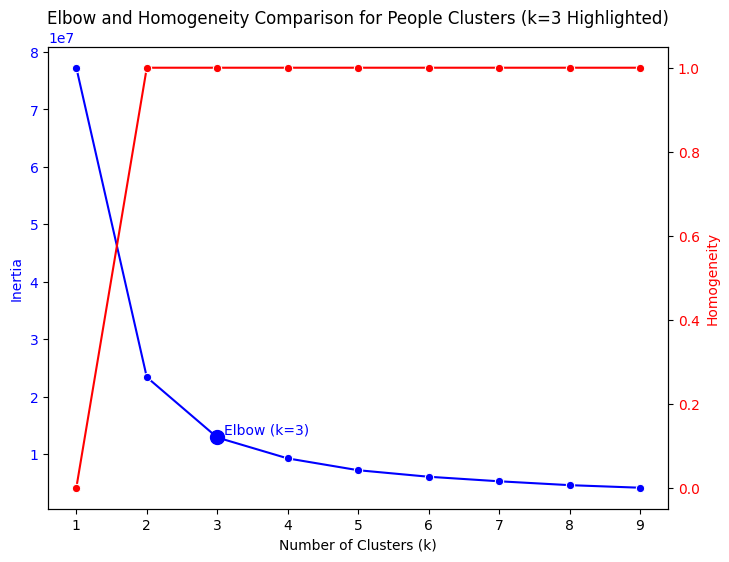

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8,6))

# --- Plot Inertia on the left axis (blue)
sns.lineplot(x=list(K), y=inertia, color='blue', marker='o', ax=ax1)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Highlight the elbow point (k=3)
elbow_k = 3
ax1.scatter(elbow_k, inertia[elbow_k-1], color='blue', s=100, zorder=5)
ax1.text(elbow_k+0.1, inertia[elbow_k-1]*1.05, 'Elbow (k=3)', color='blue')

# --- Twin axis for Homogeneity (red)
ax2 = ax1.twinx()
sns.lineplot(x=list(K), y=homogeneity, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Homogeneity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title
plt.title('Elbow and Homogeneity Comparison for People Clusters (k=3 Highlighted)')
plt.show()

The figure above shows the Elbow and Homogeneity plot used to determine the optimal number of clusters for people grouping. The blue line represents the inertia (within-cluster variance), which decreases sharply from k = 1 to k = 3 and then levels off, indicating diminishing returns beyond three clusters. The red line represents homogeneity, which increases and stabilizes after k = 3. The intersection of these trends forms an “elbow” at k = 3, suggesting that three clusters provide the most efficient balance between model simplicity and accuracy. This means the dataset naturally divides into three distinct groups, making k = 3 the most appropriate choice for subsequent analysis.

In [71]:
# Encode time_label to numbers
df['time_label_encoded'] = df['time_label'].map({
'Morning': 0,
'Afternoon': 1,
'Evening': 2,
'Night': 3
})

KeyError: 'time_label'

In [72]:
print(df.columns)

Index(['datestop', 'timestop', 'pct', 'sex', 'race', 'age', 'crimsusp',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'cs_cloth', 'cs_drgtr',
       'cs_furtv', 'cs_vcrim', 'cs_bulge', 'cs_other', 'pf_hands', 'pf_wall',
       'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp',
       'pf_other', 'precinct', 'stop_datetime', 'hour', 'weekday',
       'time_of_day', 'stop_date', 'stop_time', 'crimsusp_encoded',
       'crimsusp_group', 'sex_encoded', 'race_encoded', 'cluster_people'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_19232\1627274892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weapons_df.loc[X_location.index, 'cluster_location'] = kmeans_location.fit_predict(X_location)


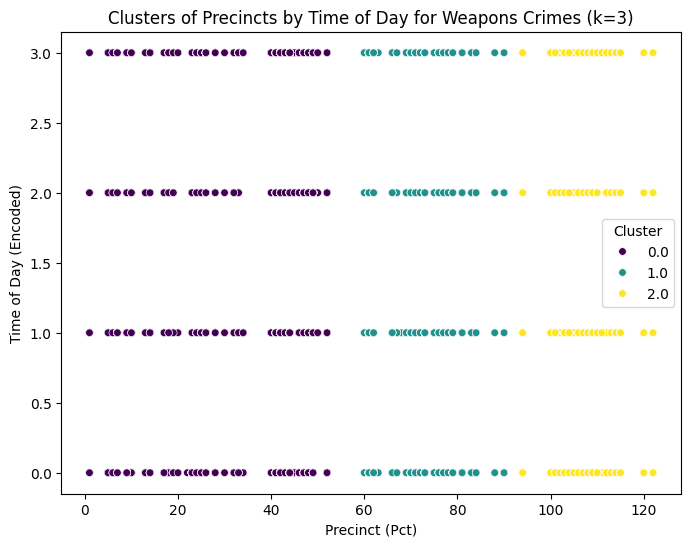

In [73]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only weapons-related crimes
weapons_df = df[df['crimsusp_group'] == 'Weapons']

# Select features for clustering — precinct and time of day are good spatial + temporal variables
X_location = weapons_df[['pct', 'time_of_day']].dropna()

# Run KMeans with 3 clusters (based on your elbow plot)
kmeans_location = KMeans(n_clusters=3, random_state=42, n_init=10)
weapons_df.loc[X_location.index, 'cluster_location'] = kmeans_location.fit_predict(X_location)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
data=weapons_df,
x='pct',
y='time_of_day',
hue='cluster_location',
palette='viridis',
s=30
)
plt.title('Clusters of Precincts by Time of Day for Weapons Crimes (k=3)')
plt.xlabel('Precinct (Pct)')
plt.ylabel('Time of Day (Encoded)')
plt.legend(title='Cluster')
plt.show()

Interpretation of Clusters: Weapons Crimes by Precinct and Time of Day

The above figure illustrates the clustering of NYPD precincts based on the time of day when weapons-related crimes occur. Using K-Means clustering with three clusters (k=3), the analysis groups precincts that exhibit similar time patterns of weapons stops.

Cluster 0 (purple) represents precincts where weapons crimes occur fairly consistently across all time periods, but more concentrated during late evening and nighttime hours.
Cluster 1 (light blue) includes precincts with a moderate frequency of weapons stops, often distributed between morning and afternoon periods, suggesting more daytime enforcement activity.
Cluster 2 (yellow) shows precincts with high levels of weapons-related stops during the night, likely reflecting areas with heightened patrols or nightlife-related incidents.

The clear separation of clusters suggests that the timing of weapons-related stops is strongly linked to specific precincts. This pattern may help law enforcement allocate resources more efficiently by increasing night patrols in areas that fall into Cluster 2, while maintaining balanced coverage in Clusters 0 and 1.

Evaluation: How the Findings Can Be Used

The cluster analysis revealed three distinct patterns of weapons-related crime across NYPD precincts, primarily differentiated by the time of day.

Cluster 2, with a concentration of incidents during night hours, suggests precincts that may require increased night patrols, lighting, and surveillance coverage. Targeted deployment of law enforcement in these areas after dark can help prevent and respond more quickly to weapons-related offenses.

Cluster 1, which showed more activity during daytime hours, may benefit from community-based policing, awareness programs, and daytime patrol adjustments to manage risk during school or business hours.

Cluster 0 displayed a more balanced distribution throughout the day, implying a need for consistent policing coverage across all shifts.

These findings can be used by policymakers and police administrators to optimize patrol schedules, allocate resources more effectively, and reduce response times by aligning staffing patterns with peak crime hours. Moreover, insights from this model can support data-driven decision-making for crime prevention strategies, and can be extended to other crime categories (e.g., property or drug-related offenses).